<a href="https://colab.research.google.com/github/nitya25/DM_Final_Project/blob/main/DM_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
import re 

'''Features'''
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2, SelectKBest

'''Classifiers'''
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

'''Display'''
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

'''Classifiers'''
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

'''Lemmatizer'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

'''Stemmer'''
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import PorterStemmer

'''Progress  Bar'''
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

'''Stopwords Corpus'''
import nltk
from nltk.corpus import stopwords, wordnet
stop_words = set(stopwords.words('english'))

C:\Users\SkullReaper\AppData\Local\Temp\ipykernel_31100\796073627.py:34: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
df1 = pd.read_csv('archive/Top_Posts.csv')
df2 = pd.read_csv('archive/Top_Posts_Comments.csv')
print(df1.shape)
print(df2.shape)

(2987, 10)
(223174, 2)


In [ ]:
merged_df = pd.merge(df1, df2, on='post_id', how='inner')

final_df = merged_df[['subreddit', 'comment']]
final_df.head()


,subreddit,comment
0,MachineLearning,Twitter thread: [https://twitter.com/cyrildiag...
1,MachineLearning,The future 🤯
2,MachineLearning,Simple yet very useful. Thank you for sharing ...
3,MachineLearning,"Almost guaranteed, Apple will copy your idea i..."
4,MachineLearning,Ohh the nightmare of making this into a stable...


In [ ]:
print(final_df.isnull().sum())
print(final_df.isna().sum())

subreddit     0
comment      10
dtype: int64
subreddit     0
comment      10
dtype: int64


In [ ]:
## Drop rows with null values
final_df = final_df.dropna()
print(final_df.isnull().sum())
print(final_df.isna().sum())

subreddit    0
comment      0
dtype: int64
subreddit    0
comment      0
dtype: int64


In [ ]:
# To check for duplicated data
final_df[final_df["comment"].duplicated()]

,subreddit,comment
85,MachineLearning,u/vredditdownloader
89,MachineLearning,[deleted]
111,MachineLearning,[deleted]
134,MachineLearning,*beep. boop.* I'm a bot that provides download...
137,MachineLearning,*beep. boop.* I'm a bot that provides download...
...,...,...
223115,artificial,[deleted]
223126,artificial,The GPU server can create images for 30 reques...
223130,artificial,The GPU server can create images for 30 reques...
223140,artificial,Cool


In [ ]:
# #To drop the duplicated data
df=final_df.drop_duplicates(keep='first',subset='comment')
df.shape

(209560, 2)

In [ ]:
# Train Test Split

X = df['comment']
y = df['subreddit']
x_train, x1, y_train, y1 = train_test_split(X, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x1,y1,test_size = 0.5, random_state=42)


In [ ]:
print(x_train.shape, x_val.shape, x_test.shape)

(167648,) (20956,) (20956,)


In [ ]:
#Progress bar
def process_data(data):
    data = data.progress_map(preprocess_data)  
    return data

#Preprocessing the data
def preprocess_data(review):
    document = cleaning_data(review)
    document = stopwords_data(document)
    document = lemmatize_data(document)
    document = stem_data(document)
    
    return document

In [ ]:
# Function to remove noise from text and deal with negation
def cleaning_data(comment):
    
    #Remove Non-ASCII characters
    comment = re.sub(r"\xa0",r" ",comment)
    comment = comment.encode("ascii", errors="ignore").decode()
    
    #Lower case the data
    comment = comment.lower()
    
    #Remove HTML Links
    #comment = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', comment)   
    #comment = re.sub(r'\n','',comment)
    
    #Cleaning the data by removing special characters
    comment = re.sub(r"[^A-Za-z0-9!?\'\`]", " ", comment)
    
     #Handling negations
    comment = re.sub(r"youtu.be", " youtube", comment)
    comment = re.sub(r"https", " http", comment)
    comment = re.sub(r"i'm", " i am", comment)
    #comment = re.sub(r"it's", " it is", comment)
    #comment = re.sub(r"ain't", "is not",comment)
    #comment = re.sub(r"aren't", "are not",comment)
    #comment = re.sub(r"couldn't", "could not",comment)
    #comment = re.sub(r"didnt", "did not",comment)
    #comment = re.sub(r"dont", "do not",comment)
    #comment = re.sub(r"doesn't", "does not",comment)
    #comment = re.sub(r"hadn't", "had not",comment)
    #comment = re.sub(r"hasn't", "has not",comment)
    #comment = re.sub(r"haven't", "have not",comment)
    #comment = re.sub(r"isn't", "is not",comment)
    #comment = re.sub(r"shouldn't", "should not",comment)
    #comment = re.sub(r"shan't", "shall not",comment)
    #comment = re.sub(r"wasn't", "was not",comment)
    #comment = re.sub(r"weren't", "were not",comment)
    #comment = re.sub(r"oughtn't", "ought not",comment)
    #comment = re.sub(r"that's", " that is", comment)
    comment = re.sub(r"\'s", " ", comment)
    #comment = re.sub(r"\'ve", " have", comment)
    #comment = re.sub(r"won't", " will not", comment)
    #comment = re.sub(r"wouldn't", " would not", comment)
    #comment = re.sub(r"don't", " do not", comment)
    #comment = re.sub(r"can't", " can not", comment)
    #comment = re.sub(r"cannot", " can not", comment)
    #comment = re.sub(r"n\'t", " n\'t", comment)
    #comment = re.sub(r"\'re", " are", comment)
    #comment = re.sub(r"\'d", " would", comment)
    #comment = re.sub(r"\'ll", " will", comment)    
    comment = re.sub(r"!", " ! ", comment)
    comment = re.sub(r"\?", " ? ", comment)
    comment = re.sub(r"\s{2,}", " ", comment)
    
    # Removing all the numbers
    comment = re.sub(r'[0-9]+', ' ', comment)
    
    #Removing all puncs
    comment = re.sub(r'[^\w\s]','',comment)
    
    # Substituting multiple spaces with single space
    comment = re.sub(r'\s+', ' ', comment, flags=re.I)
    
    # Remove single letters
    comment= re.sub(r"\b[a-zA-Z]\b","", comment)
        
    comment = [word for word in comment.split() if len(word) >= 2]
    comment = ' '.join(comment)
    
    return comment
  
#Removing the stop words
def stopwords_data(comment):
    more_stop_words = ["wa", "gt","amp", "u", "ha", "le", "doe", "don",'ve']
    stop_words_ = stop_words.union(more_stop_words)
    comment = [word for word in comment.split() if not word in stop_words_]
    comment = ' '.join(comment)           
    return comment
  
#Tag words by their parts of speech 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#Normalising the data by lemmatizing
def lemmatize_data(comment):
    comment = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in comment.split()]
    comment = ' '.join(comment)
    comment = [word for word in comment.split() if len(word) >= 3]
    comment = ' '.join(comment)
    return comment

#Normalise data by user-defined stemming
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

def stemmer(phrase):
    r=[]
    for word in phrase.split():
        r.append(stem(word))
    return ' '.join(r)
  
#Normalising the data by renowned stemming methods

stemmer=SnowballStemmer('english')
def stem_data(comment):
    comment = [stemmer.stem(word) for word in comment.split()]
    comment = ' '.join(comment)
    comment = [word for word in comment.split() if len(word) >= 3]
    comment = ' '.join(comment)
    return comment
    
#list of cleaned words
def cleandata(X_datatrain, X_datatest):
    cleandata_Train = []
    for sen in range(0, len(X_datatrain)): 
        cleandata_Train.append(preprocess_data(str(X_datatrain[sen])))
        
    cleandata_Test = []
    for sen in range(0, len(X_datatest)): 
        cleandata_Test.append(preprocess_data(str(X_datatest[sen])))
    return cleandata_Train, cleandata_Test

In [ ]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SkullReaper\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SkullReaper\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SkullReaper\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
print("Cleaning of Training data on process...")
cleandata_Train = process_data(x_train)
print("Task completed")
print("Cleaning of Testing data on process...")
cleandata_Test = process_data(x_test)
print("Task completed")
print("Cleaning of Testing data on process...")
cleandata_Test = process_data(x_val)
print("Task completed")

Cleaning of Training data on process...


progress-bar: 100%|██████████| 167648/167648 [1:03:25<00:00, 44.06it/s]


Task completed
Cleaning of Testing data on process...


progress-bar: 100%|██████████| 20956/20956 [07:47<00:00, 44.86it/s]


Task completed
Cleaning of Testing data on process...


progress-bar: 100%|██████████| 20956/20956 [07:52<00:00, 44.33it/s]

Task completed


## **LDA Implementation**

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(cleandata_Train))

print(data_words[:1])

[['two', 'reason', 'rule', 'least', 'direct', 'report', 'locat', 'justifi', 'senior', 'manag', 'say', 'locat', 'tri', 'hire', 'citi', 'werent', 'abl', 'find', 'enough', 'good', 'talent', 'convert', 'role', 'bay', 'area', 'end', 'hire', 'appeas', 'god', 'transit', 'hand', 'manag', 'team', 'director', 'bay', 'area', 'felt', 'like', 'wasnt', 'right', 'team', 'lead', 'larg', 'team', 'person', 'either', 'time', 'zone', 'team', 'oper', 'hard', 'could', 'without', 'sacrific', 'saniti', 'could', 'choic', 'support', 'bias', 'speak', 'honest', 'enjoy', 'high', 'level', 'manag', 'expect', 'still', 'regular', 'mentor', 'folk', 'drive', 'technic', 'direct', 'fair', 'larg', 'org', 'direct', 'respons', 'hire', 'fire', 'decis', 'manag', 'larg', 'team', 'freed', 'lot', 'time', 'focus', 'impact', 'work']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['two', 'reason', 'rule', 'least', 'direct', 'report', 'locat', 'justifi', 'senior', 'manag', 'say', 'locat', 'tri', 'hire', 'citi', 'werent', 'abl', 'find', 'enough', 'good', 'talent', 'convert', 'role', 'bay_area', 'end', 'hire', 'appeas', 'god', 'transit', 'hand', 'manag', 'team', 'director', 'bay_area', 'felt', 'like', 'wasnt', 'right', 'team', 'lead', 'larg', 'team', 'person', 'either', 'time', 'zone', 'team', 'oper', 'hard', 'could', 'without', 'sacrific', 'saniti', 'could', 'choic', 'support', 'bias', 'speak', 'honest', 'enjoy', 'high', 'level', 'manag', 'expect', 'still', 'regular', 'mentor', 'folk', 'drive', 'technic', 'direct', 'fair', 'larg', 'org', 'direct', 'respons', 'hire', 'fire', 'decis', 'manag', 'larg', 'team', 'freed', 'lot', 'time', 'focus', 'impact', 'work']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['reason', 'rule', 'least', 'direct', 'report', 'senior', 'manag', 'say', 'hire', 'abl', 'find', 'enough', 'good', 'talent', 'convert', 'role', 'hire', 'transit', 'hand', 'feel', 'right', 'team', 'lead', 'larg', 'team', 'person', 'time', 'zone', 'team', 'oper', 'hard', 'choic', 'support', 'bias', 'speak', 'honest', 'enjoy', 'high', 'level', 'manag', 'expect', 'still', 'regular', 'mentor', 'folk', 'drive', 'technic', 'direct', 'fair', 'larg', 'org', 'direct', 'respon', 'hire', 'fire', 'decis', 'team', 'free', 'lot', 'time', 'focus', 'impact', 'work']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 4), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abl', 1),
  ('bias', 1),
  ('choic', 1),
  ('convert', 1),
  ('decis', 1),
  ('direct', 3),
  ('drive', 1),
  ('enjoy', 1),
  ('enough', 1),
  ('expect', 1),
  ('fair', 1),
  ('feel', 1),
  ('find', 1),
  ('fire', 1),
  ('focus', 1),
  ('folk', 1),
  ('free', 1),
  ('good', 1),
  ('hand', 1),
  ('hard', 1),
  ('high', 1),
  ('hire', 3),
  ('honest', 1),
  ('impact', 1),
  ('larg', 2),
  ('lead', 1),
  ('least', 1),
  ('level', 1),
  ('lot', 1),
  ('manag', 2),
  ('mentor', 1),
  ('oper', 1),
  ('org', 1),
  ('person', 1),
  ('reason', 1),
  ('regular', 1),
  ('report', 1),
  ('respon', 1),
  ('right', 1),
  ('role', 1),
  ('rule', 1),
  ('say', 1),
  ('senior', 1),
  ('speak', 1),
  ('still', 1),
  ('support', 1),
  ('talent', 1),
  ('team', 4),
  ('technic', 1),
  ('time', 2),
  ('transit', 1),
  ('work', 1),
  ('zone', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"use" + 0.019*"learn" + 0.016*"model" + 0.012*"think" + 0.009*"see" + '
  '0.009*"make" + 0.009*"differ" + 0.009*"mean" + 0.008*"point" + '
  '0.008*"problem"'),
 (1,
  '0.036*"com" + 0.031*"paper" + 0.022*"http" + 0.021*"comment" + '
  '0.018*"reddit" + 0.017*"googl" + 0.017*"post" + 0.012*"video" + 0.012*"www" '
  '+ 0.011*"research"'),
 (2,
  '0.024*"get" + 0.023*"work" + 0.019*"datum" + 0.015*"good" + 0.015*"time" + '
  '0.014*"know" + 0.013*"peopl" + 0.012*"need" + 0.011*"job" + 0.011*"make"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.3542632309023315

Coherence Score:  0.6772417926792933


# Visualize The Data

<Axes: xlabel='subreddit'>

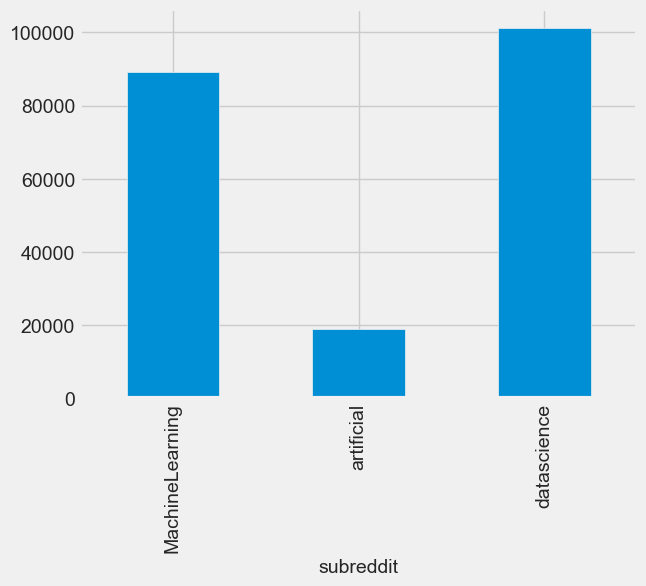

In [ ]:
import matplotlib.pyplot as plt

df.groupby('subreddit').subreddit.count().plot.bar(ylim=0)

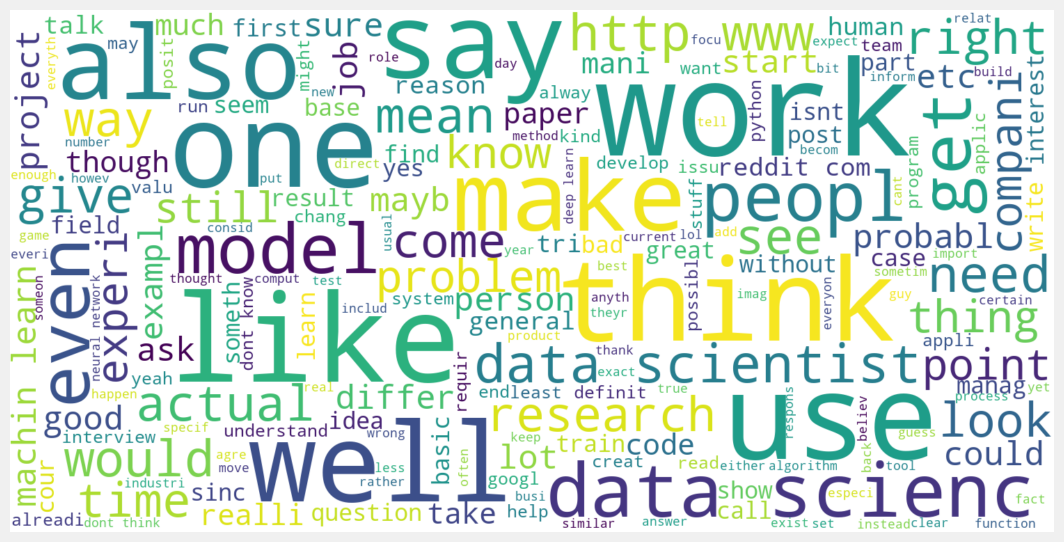

In [ ]:
#Word Cloud 
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud, STOPWORDS
string = []
for t in cleandata_Train:
    string.append(t)
string = pd.Series(string).str.cat(sep=' ')
wordcloud = WordCloud(width=1500, height=750,max_font_size=190,background_color='white', stopwords=stop_words).generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print(cleandata_Train.shape)
print(y_train.head())

(167648,)
119537        datascience
221117         artificial
59967     MachineLearning
79994     MachineLearning
105576    MachineLearning
Name: subreddit, dtype: object


In [ ]:
#Find the most corelated unigrams and bigrams of each subreddit
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', 
                        ngram_range=(1, 1), 
                        stop_words='english')

features = tfidf.fit_transform(cleandata_Train)#df.comment)
labels = y_train
subreddit_classes = y_train.unique()
N = 5
for subreddit_class in subreddit_classes:
    features_chi2 = chi2(features, labels == subreddit_class)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(subreddit_class))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'datascience':
  . Most correlated unigrams:
. paper
. scienc
. scientist
. job
. data
  . Most correlated bigrams:
. 
# 'artificial':
  . Most correlated unigrams:
. intellig
. data
. artifici
. robot
. human
  . Most correlated bigrams:
. 
# 'MachineLearning':
  . Most correlated unigrams:
. scienc
. scientist
. job
. paper
. data
  . Most correlated bigrams:
. 


In [ ]:
def confusion_matrix(ypred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(confusion_matrix(y_test, ypred, labels=np.unique(y_test)), annot=True, fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=ax)
    #display(pd.DataFrame(confusion_matrix(y_test , ypred), columns=['Pred: Reddit','CS:GO','Overwatch','Music','anime','baseball','canada','conspiracy','europe','funny','GOT','hockey','movies','LOL','nba','soccer','nfl','trees','news','wow'], index=['AskReddit','GlobalOffensive','Overwatch','Music','anime','baseball','canada','conspiracy','europe','funny','GOT','hockey','movies','league of legends','nba','soccer','nfl','trees','news','wow']))
    print(classification_report(y_test,ypred))  
    Accuracy = accuracy_score(y_test, ypred)
    return Accuracy

In [ ]:
print(stop_words)

{'out', 'some', 'being', "needn't", 'you', 'so', 'nor', 'where', 't', 'when', 'or', 'its', "aren't", "hasn't", 'hadn', "didn't", "hadn't", 'that', 'won', 'mightn', 'here', 'between', 'what', 'couldn', 'very', 'over', 'they', 'her', 'whom', 'd', 'needn', 'same', 'ma', "that'll", 'aren', "isn't", "weren't", 'than', 'hers', 'who', 'my', 'each', 'only', 'if', 'was', 'an', 'yours', 'were', "doesn't", 'all', 'too', 'there', 'why', 'while', 'more', 'did', 'itself', 'few', 'having', 'by', 'herself', 'ourselves', 'yourself', 'it', 'but', 'll', 'those', 's', 'didn', 'just', 'doing', 'a', 'after', "it's", 'be', 'up', 'are', 'y', "mightn't", "won't", 'this', 'isn', 'shan', 'below', 'your', 'our', 'down', 'own', 'into', 'mustn', 'the', "don't", 'can', 'haven', "you've", 'doesn', 'once', 'and', "mustn't", "should've", 'then', 'ain', 'during', 'themselves', 'of', 'about', "you'll", 'under', 'wasn', 'him', 'his', 'their', 'at', 'above', "couldn't", 'theirs', 'with', 'himself', 'not', 'i', 'we', 'yours

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best cross-validation score: 0.72
Best score: 0.7174377209834342
Best paramters: {'nb__alpha': 0.15, 'nb__fit_prior': True, 'tvec__min_df': 2, 'univ_select__k': 15000}
Best estimator:  Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.7, min_df=2, stop_words='english',
                                 sublinear_tf=True)),
                ('univ_select',
                 SelectKBest(k=15000,
                             score_func=<function chi2 at 0x0000023C73189870>)),
                ('nb', MultinomialNB(alpha=0.15))])
Model score on x_train: 0.7482761500286315
Accuracy score of prediction: 0.6518896736018324
                 precision    recall  f1-score   support

MachineLearning       0.66      0.62      0.64      9365
     artificial       0.07      0.33      0.12       394
    datascience       0.75      0.69      0.72     11197

       accuracy                           0.65     20956
      macro avg

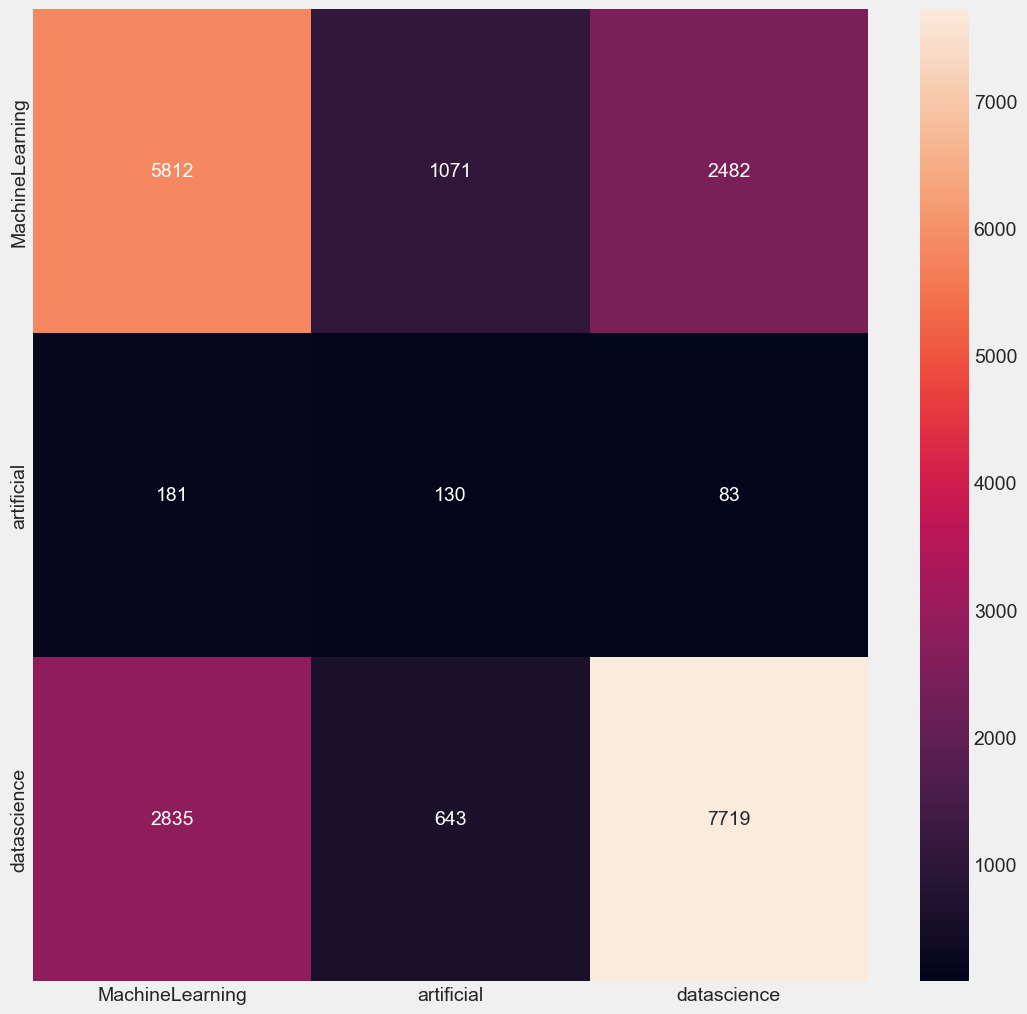

In [ ]:
# Defining a pipeline that prints the score, parameters, recall, precision, conf matrix of the best gridsearch model
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english',sublinear_tf=True,max_df=0.7,ngram_range=(1,1))),
    ("univ_select", SelectKBest(chi2)),
    ('nb', MultinomialNB())
])

grid_params = {
    'tvec__min_df': (1,2),
    "univ_select__k": [10000,15000],
    'nb__fit_prior': [True],
    'nb__alpha': [0.07, 0.1, 0.15, 0.2, 0.3],

}


#X_training, X_testing, y_training, y_testing = train_test_split(cleandata_Train, y_train, test_size=0.2,stratify=y_train)
    
grid_search = GridSearchCV(pipe, grid_params, cv = 5, verbose = 1, n_jobs = -1)
grid_search.fit(cleandata_Train, y_train)

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# Printing the best score/parameters from the grid search
print('Best score: {}'.format(grid_search.best_score_))
print('Best paramters: {}'.format(grid_search.best_params_))

# Best model from grid search
grid_model = grid_search.best_estimator_
print("Best estimator: ", grid_model)
print('Model score on x_train: {}'.format(grid_model.score(cleandata_Train, y_train)))

# Prediction and score
prediction = grid_model.predict(x_test)
print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, prediction)))

# Confusion Matrix
conf_matrix_grid = confusion_matrix(y_test, prediction)

# Count Vectorization along with TFIDF Transformation

In [ ]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1, 1),min_df=2,max_df=0.7)
X_train_vect = vectorizer.fit_transform(cleandata_Train) 
X_test_vect = vectorizer.transform(cleandata_Test)
X_train_vect.shape

(167648, 25383)

In [ ]:
tfidfconverter = TfidfTransformer(sublinear_tf=True, use_idf =True, norm='l2')  
X_train_tfidf = tfidfconverter.fit_transform(X_train_vect)
X_test_tfidf = tfidfconverter.transform(X_test_vect)
X_tfidf=X_train_tfidf
y_train=y_train

# CHI2 test to select K best features

In [ ]:
chi2_selector = SelectKBest(chi2)
X_tfidf_sel2 = chi2_selector.fit_transform(X_tfidf, y_train) 
X_test_tfidf_sel2 = chi2_selector.transform(X_test_tfidf)

In [ ]:
# Basic multinomial NB - Only accuracy score
clf = MultinomialNB(alpha = 0.08, fit_prior = False)
pred_acc = cross_val_score(clf, X_tfidf_sel2, y_train, cv = 5)
print(pred_acc.mean())

0.5501228807478686


# TFIDF values of the most frequent words

In [ ]:
dfmat = pd.DataFrame(data={"count":X_train_tfidf.sum(axis=0).tolist()[0], "name":vectorizer.get_feature_names_out()})
dfmat = dfmat.sort_values(by="count", ascending = False)

In [ ]:
dfmat.head(20)

,count,name
5054,"3,466.19",data
12476,"3,233.28",like
24882,"3,073.68",work
23788,"3,049.30",use
12990,"2,468.41",make
6136,"2,455.78",dont
22192,"2,367.62",think
16212,"2,335.50",peopl
22084,"2,283.73",thank
11927,"2,162.05",know


In [ ]:
#Spliting the dataset for training and validation:
X_training, X_testing, y_training, y_testing = train_test_split(X_tfidf_sel2, y_train, test_size=0.2,stratify=y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best cross-validation score: 0.25
Best parameters:  {'alpha': 0.01}
Best estimator:  BernoulliNB(alpha=0.01, binarize=0.12, fit_prior=False)
Time to train and predict in Bernoulli Naive Bayes Model: 2.6813805103302
                 precision    recall  f1-score   support

MachineLearning       0.86      0.06      0.10     14334
     artificial       0.11      0.95      0.19      3032
    datascience       0.84      0.28      0.42     16164

       accuracy                           0.25     33530
      macro avg       0.60      0.43      0.24     33530
   weighted avg       0.78      0.25      0.27     33530



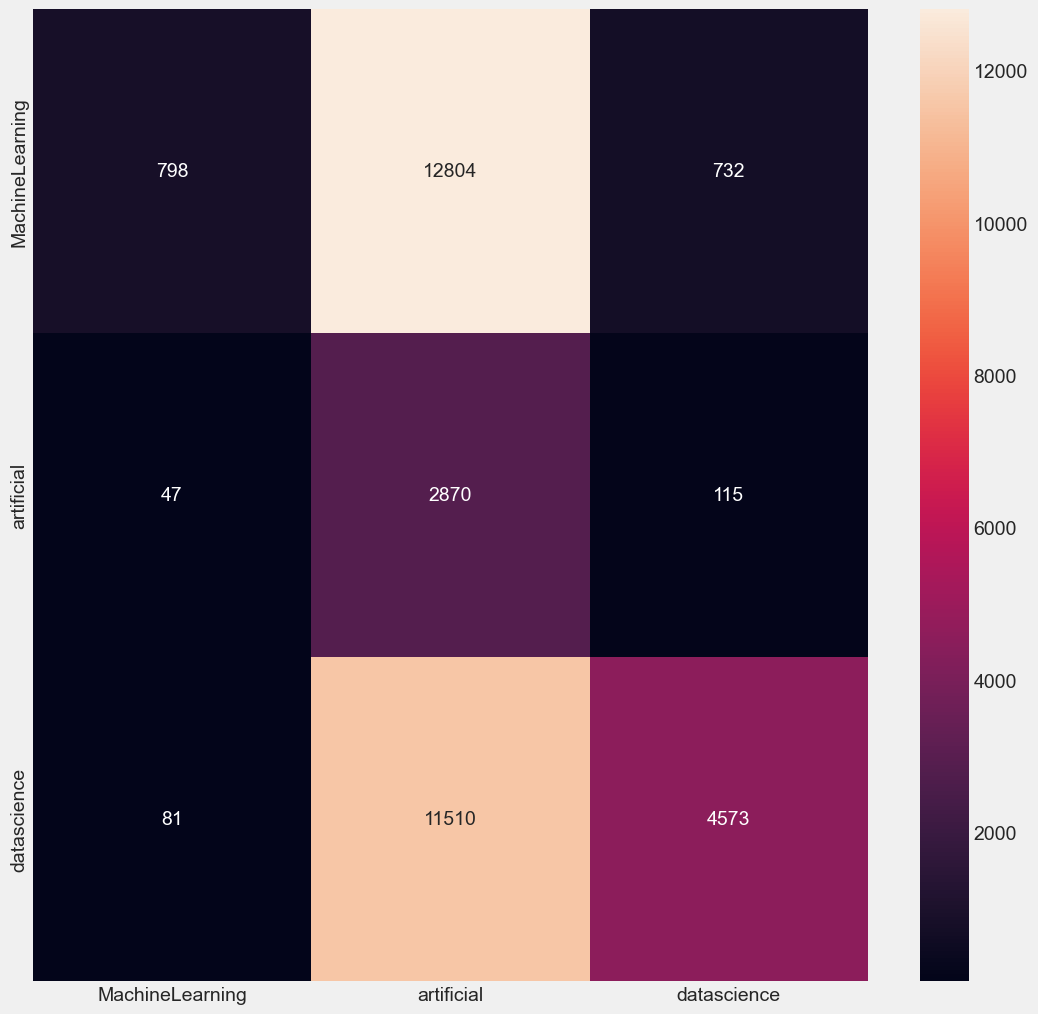

In [ ]:
from sklearn.naive_bayes import BernoulliNB
#Bernoulli Naive Bayes
param_grid = {'alpha': [0.01, 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(BernoulliNB(fit_prior = False, binarize = 0.12), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
bnb = grid.best_estimator_
ypred_val_rc = bnb.predict(X_testing)
y_pred_test_rc=bnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Bernoulli Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_rc, y_testing)
bnbacc = accuracy_score(ypred_val_rc, y_testing)

Best cross-validation score: 0.52
Best parameters:  {'alpha': 0.05, 'fit_prior': True}
Best estimator:  MultinomialNB(alpha=0.05)
Time to train and predict in Multinominal Naive Bayes Model: 2.4688501358032227
                 precision    recall  f1-score   support

MachineLearning       0.76      0.12      0.20     14334
     artificial       0.00      0.00      0.00      3032
    datascience       0.51      0.99      0.67     16164

       accuracy                           0.52     33530
      macro avg       0.42      0.37      0.29     33530
   weighted avg       0.57      0.52      0.41     33530



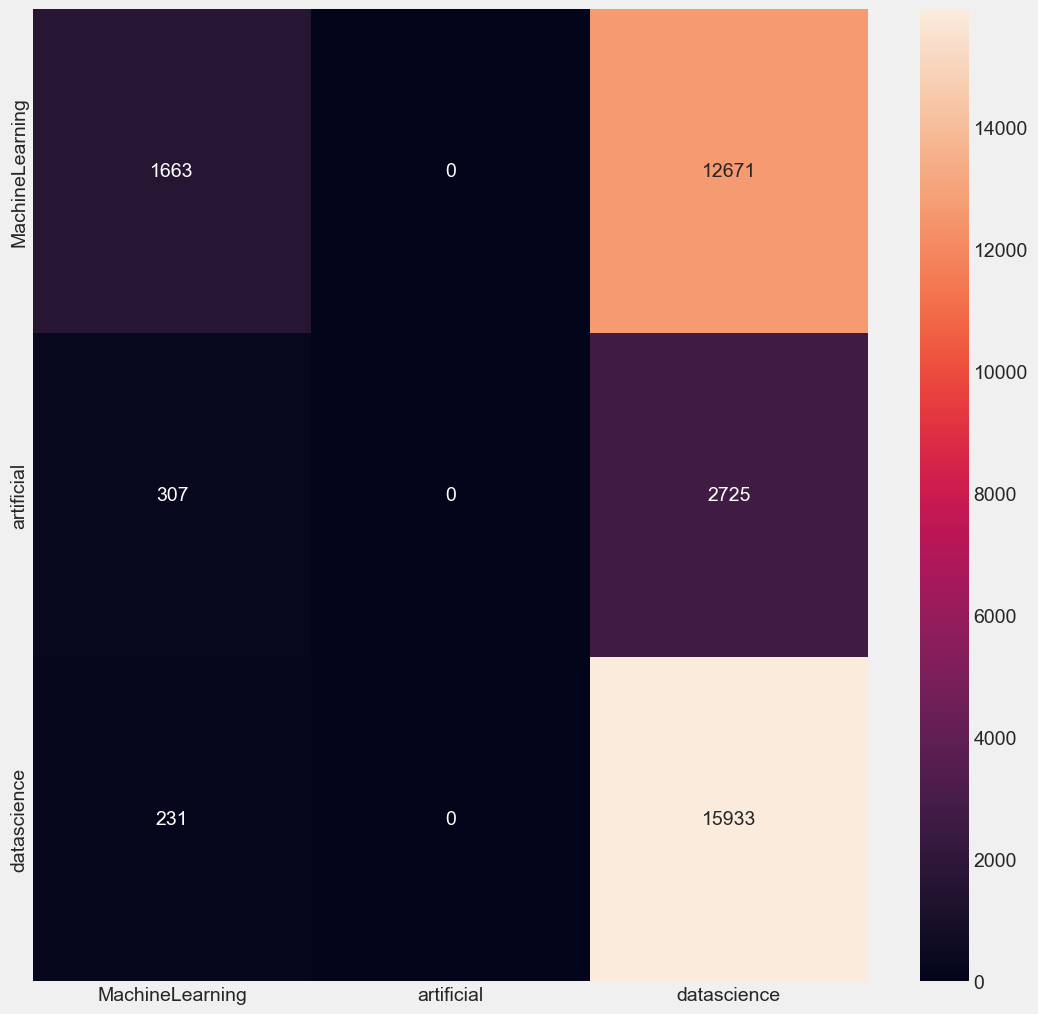

In [ ]:
#Multinominal Naive Bayes Classifier:
param_grid = {
            'fit_prior': [True],
            'alpha': [0.05, 0.07, 0.08, 0.1, 0.15]}
grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
mnb = grid.best_estimator_
ypred_val_mnb   = mnb.predict(X_testing)
y_pred_test_mnb = mnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Multinominal Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_mnb, y_testing)
mnbacc = accuracy_score(ypred_val_mnb, y_testing)

Best cross-validation score: 0.56
Best parameters:  {'alpha': 0.4, 'fit_prior': True}
Best estimator:  ComplementNB(alpha=0.4)
Time to train and predict in Complement Naive Bayes Model: 1.713944911956787
                 precision    recall  f1-score   support

MachineLearning       0.50      0.91      0.64     14334
     artificial       0.00      0.00      0.00      3032
    datascience       0.79      0.36      0.50     16164

       accuracy                           0.56     33530
      macro avg       0.43      0.42      0.38     33530
   weighted avg       0.60      0.56      0.51     33530



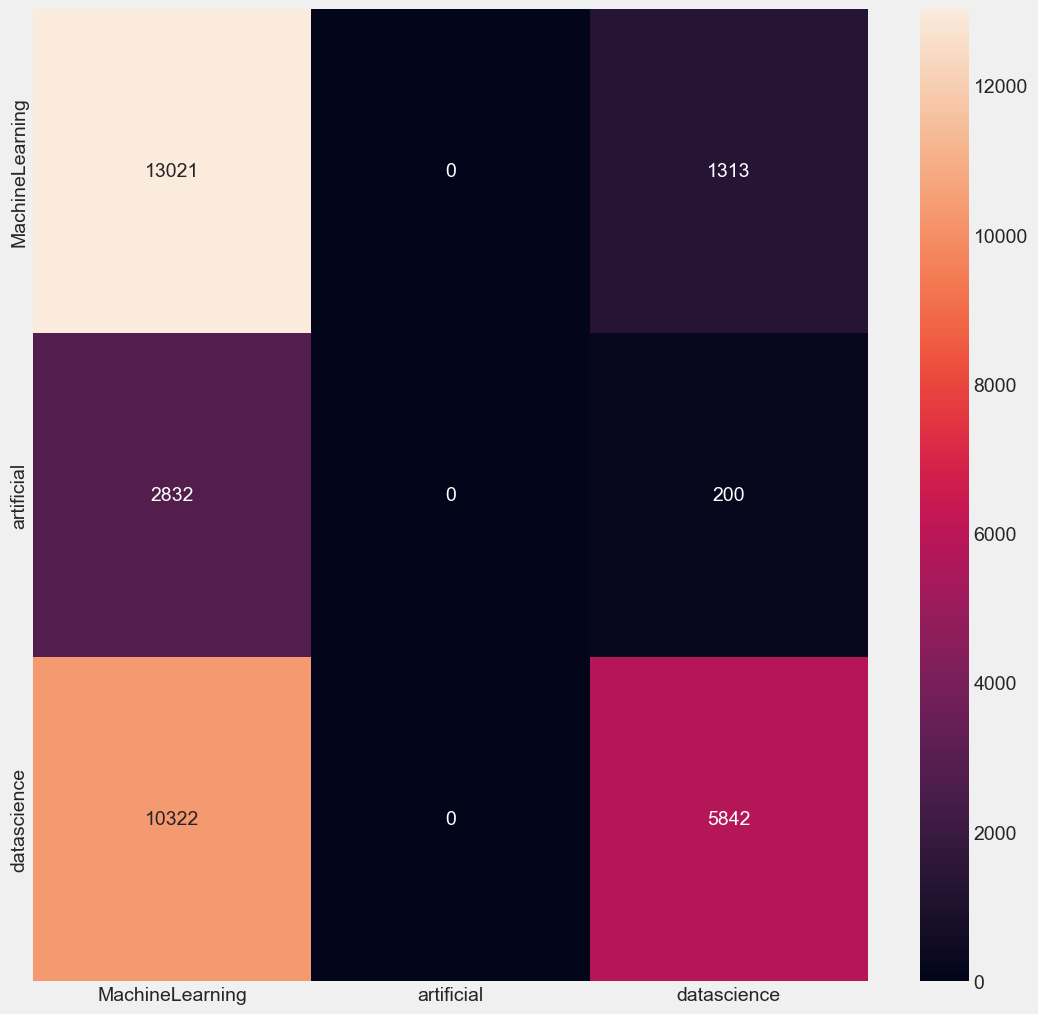

In [ ]:
from sklearn.naive_bayes import ComplementNB
#Complement Naive Bayes Classifier:
param_grid = {
            'fit_prior': [True],
            'alpha': [0.4, 0.5, 0.6]}
grid = GridSearchCV(ComplementNB(), param_grid, cv=5,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
cnb = grid.best_estimator_
ypred_val_cnb   = cnb.predict(X_testing)
y_pred_test_cnb = cnb.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Complement Naive Bayes Model: {}'.format(end-start))
confusion_matrix(ypred_val_cnb, y_testing)
cnbacc = accuracy_score(ypred_val_cnb, y_testing)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best cross-validation score: 0.56
Best parameters:  {'C': 10, 'multi_class': 'multinomial'}
Best estimator:  LogisticRegression(C=10, multi_class='multinomial')
Time to train and predict in Logistic Regression Model: 19.116493701934814
                 precision    recall  f1-score   support

MachineLearning       0.50      0.91      0.64     14334
     artificial       0.15      0.00      0.00      3032
    datascience       0.79      0.36      0.50     16164

       accuracy                           0.56     33530
      macro avg       0.48      0.42      0.38     33530
   weighted avg       0.61      0.56      0.51     33530



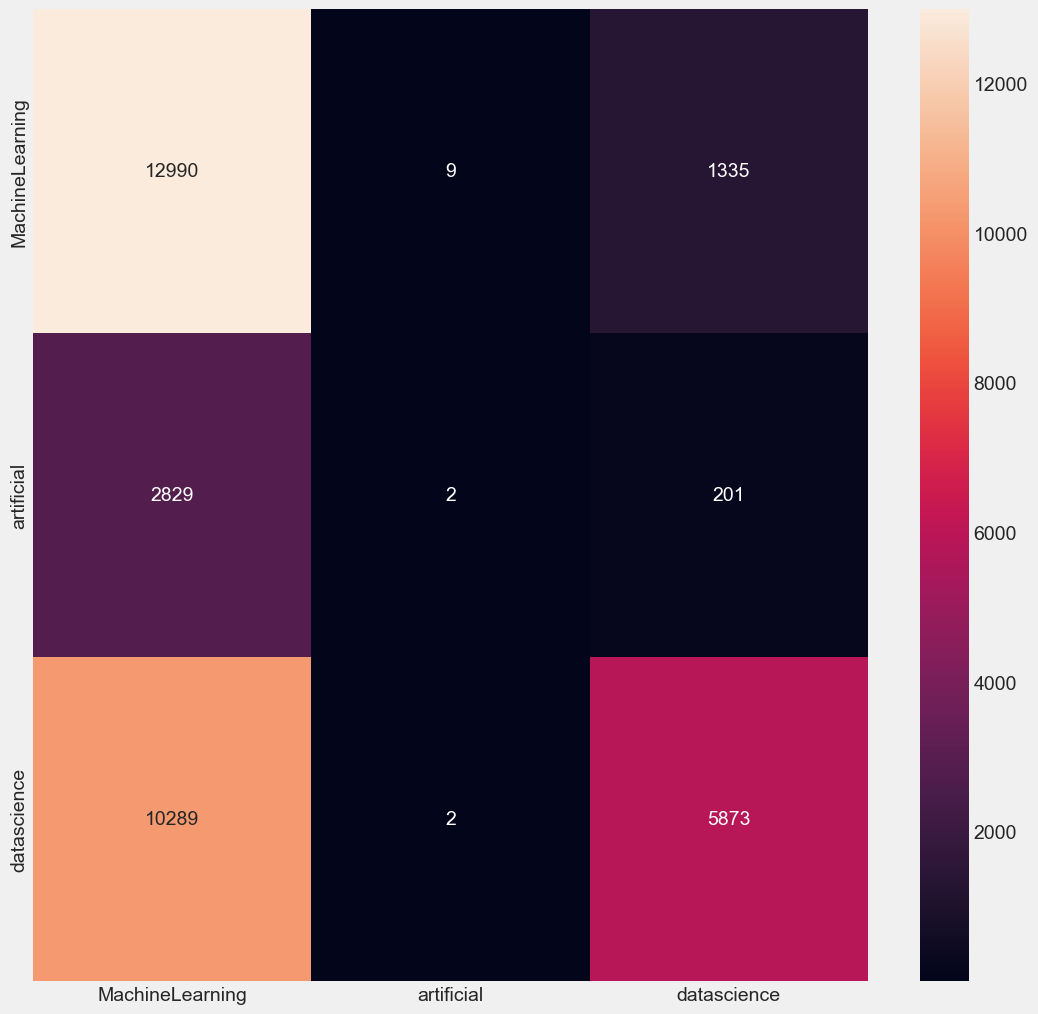

In [ ]:
#Logistic Regression
param_grid = {'C': [1, 10, 100, 1000 ],
                 'multi_class':['multinomial','ovr']}
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5,verbose=1,n_jobs=-1)
start = time.time()
grid.fit(X_training, y_training)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
lr = grid.best_estimator_
ypred_val_lr = lr.predict(X_testing)
y_pred_test_lr=lr.predict(X_tfidf_sel2)
end =  time.time()
print('Time to train and predict in Logistic Regression Model: {}'.format(end-start))
confusion_matrix(ypred_val_lr, y_testing)
lracc = accuracy_score(ypred_val_lr, y_testing)

# Naive Bayes from Scratch

In [ ]:
import numpy as np
import scipy.sparse

class NaiveBayes: 
    
    def __init__(self):
        self.theta_k=0.
        self.theta_jk=0.
        
    def fit(self,X,y):
        index=[]
        self.theta_jk=np.zeros((3,X.shape[1]))
        self.theta_k=np.zeros(3)
        
        self.classes = np.unique(y)
        
        #calculating theta  for each 
        for k, class_val in enumerate(self.classes):
            #finding indexes where inputs are in class k
            index=np.where(y==class_val)
            #finding pobability of each class
            self.theta_k[k] = (len(index[0]))/float(y.shape[0])
            #computing conditional probability of each feature for each class 
            #Laplace smoothing is used to deal with words which are not observed 
            #in the training data but are available in the training set
            self.theta_jk[k][:] = (scipy.sparse.csr_matrix.sum(X[index],axis=0)+1)/(float(len(index[0]))+2)
                  
        return
    
    def predict(self,X):
        
        prob_y=np.zeros((3,len(X)))
        for k, class_val in enumerate(self.classes):
            
            w0 = np.log(self.theta_k[k])+((np.log(1-self.theta_jk[k][:])).sum())
            w = np.log(self.theta_jk[k][:])-np.log(1-self.theta_jk[k][:])
            #The probabilitis of being in each of k classes for each of input data(comments)
            prob_y[k]=np.matmul(X,w.T) + w0  
        #selecting the class with higher probability for each input data (comment)
        y_predict=self.classes[np.argmax(prob_y.T, axis=1)]

        return y_predict
    
    def score(self,y,y_pred):
        #number of predictions       
        num_pred = float(len(y))
        #calculating average accuracy over all classes
        average_acc = np.sum((y==y_pred)*1)/num_pred
        #calculating accuracy for each class 
        acc=np.zeros(20)
        
        #classes = np.unique(y)
        
        for k, class_val in enumerate(self.classes): 
            index=np.where(y==class_val)
            num_pred=float(len(index[0]))
            acc[k]= (np.sum(y_pred[index]==class_val).astype(int))/num_pred
        return acc,average_acc
    
    def get_classes(self):
        return self.classes
    
def test(X_training, y_training, X_testing, y_testing):
    
    
    d = NaiveBayes()
    
    #X_training = X_train  
    y_training = np.array(y_training)
    X_testing = X_testing.toarray()
    y_testing = np.array(y_testing)
    d.fit(X_training, y_training)
    y_prediction = d.predict(X_testing)
    (acc, average_acc) = d.score(y_testing, y_prediction)
    print("Average accuracy on test set: ", average_acc)
    return average_acc
    # print("\nAccuracy on test set for each class: ")
    # for a,b in zip(d.get_classes(),acc):
    #     print(a, ": ", b)
        
nbsacc = test(X_training, y_training, X_testing, y_testing)

Average accuracy on test set:  0.5232627497763197


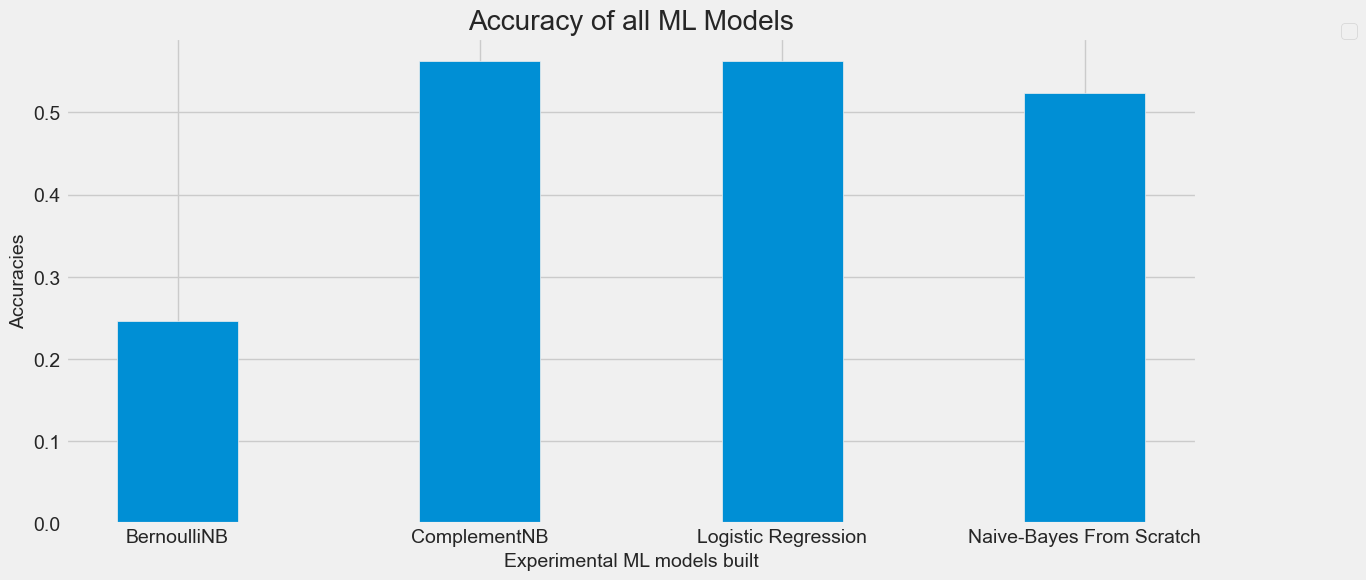

In [ ]:
#Comparison between different models

import pandas as pd
import matplotlib.pyplot as plt

models = ['BernoulliNB', 'ComplementNB', 'Logistic Regression', 'Naive-Bayes From Scratch']
val_accuracies = [bnbacc, cnbacc, lracc, nbsacc]
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot
plt.bar(X_axis, val_accuracies, width = 0.4)
plt.xticks(X_axis, models)
plt.xlabel("Experimental ML models built")
plt.ylabel("Accuracies")
plt.title("Accuracy of all ML Models")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()

In [ ]:
#https://github.com/nikhilpodila/Reddit-Classification/blob/master/writeup.pdf